Apply Model to some inputs Learn how:

Load a saved Model
Select inputs
Apply Model to inputs (Predict)

Import packages

In [2]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

Some verifications

Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [3]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [4]:
#use numpy reshape
x_train = np.reshape(X_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(X_valid, (10000, 28 * 28)).astype('float32')

Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [5]:
#print(x_train)
x_train /=  255
x_valid /=  255

Load Model

In [6]:
from tensorflow.keras.models import load_model

#load Model
folder = "logs/crossEntropyReLu2LayersWI/20200229-180923/"
model = load_model(folder + 'model_all.h5')


Select some inputs

In [7]:
#print(x_train[0])
size = 1000
indexes = np.random.randint(0, y_valid.size-1, size=size)
tf.print("indexes:", indexes)
x = np.array([x_valid[i] for i in indexes])
X = np.array([X_valid[i] for i in indexes])
y = np.array([y_valid[i] for i in indexes])
tf.print(x.shape)
tf.print(y.shape)
# x = np.array([x_train[0], x_train[1], x_train[4566]])
# y = np.array([y_train[0], y_train[1], y_train[4566]])


indexes: array([3940, 8558, 1412, 9910, 7374,  411, 1855, 3715, 1451, 9562, 1559,
       8247, 1022, 9485, 9570, 3762, 8677,  610,  744, 5638, 4332, 6397,
        728, 2097, 2213, 5218, 1364, 2018, 5890, 7754, 4545, 9277, 9341,
       1509, 7729, 2612, 4687, 6669, 8363, 7786, 5396, 3825, 4006, 7767,
       6336, 4723, 2161, 5917, 2374,  285,  718, 4166, 5937,  882, 1272,
       9249, 9954, 3891, 6083, 9877, 4131, 9186, 8778, 9321, 8762, 4567,
       7560, 7997, 9252, 4500, 5974, 1914, 1978, 4217, 3387, 8815, 8032,
       6962, 2708, 6877, 5948, 6794, 9579, 4658, 1228, 4533, 4766, 7315,
       9839,  386, 5254, 2578, 3789,  344, 1632, 8299, 4477, 6386, 1910,
       5425, 8382, 6921, 3501, 8108, 2085, 5954, 6522, 9442, 1215,  815,
        335, 3254, 8269, 3921, 2087, 1573, 1825, 8175,  698, 8776, 2752,
       6118, 3578, 2319, 8368, 5383, 9863, 3749, 5178,  383, 7399,  516,
        242, 4840, 4595,  884, 3953, 9396, 4424, 7762, 9621, 3408, 6899,
       9859, 6748, 9058, 6724, 8613, 3951,

Predict

In [8]:
 
#predict
y_predicted = model.predict_classes(x)


Print Prediction results

In [9]:
#print prediction results
#tf.print("y:", y)
#tf.print("predicted classes", y_predicted)

In [10]:
#check if prediction is valid
comparison = y == y_predicted
equal_arrays = comparison.all()

#prints True if All is OK
print(equal_arrays)

#print not predicted indexes
diff = y - y_predicted
 
indexes_false = np.array([i for i in np.arange(diff.size) if diff[i] != 0])
print("Not predicted indexes:", indexes_false)
print("Not predicted y:", [y[i] for i in indexes_false])
print("Not predicted y_predicted:", [y_predicted[i] for i in indexes_false])

False
Not predicted indexes: [ 15  17  52  88 203 249 439 459 475 564 594 672 682 689 719 722 786 803
 807 899 920 924 934 961 971 974 988 994]
Not predicted y: [6, 4, 5, 2, 2, 7, 9, 1, 8, 6, 8, 7, 5, 5, 9, 3, 6, 5, 8, 3, 4, 4, 7, 3, 5, 1, 5, 9]
Not predicted y_predicted: [8, 2, 3, 3, 8, 1, 1, 2, 4, 5, 0, 9, 8, 8, 3, 2, 4, 8, 0, 8, 9, 9, 2, 2, 8, 2, 8, 8]


In [11]:
#Accuracy
acc =  1- indexes_false.size/size
print("Accuracy = ", acc)

Accuracy =  0.972


In [12]:
 
np.array(indexes_false)

array([ 15,  17,  52,  88, 203, 249, 439, 459, 475, 564, 594, 672, 682,
       689, 719, 722, 786, 803, 807, 899, 920, 924, 934, 961, 971, 974,
       988, 994])

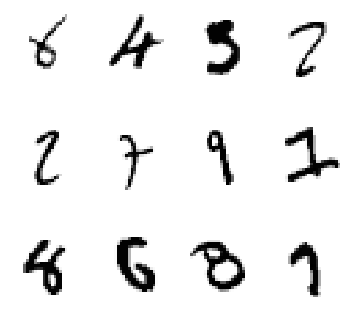

In [13]:
plt.figure(figsize=(5,5))
for k in  np.arange(min(indexes_false.size, 12)):
    plt.subplot(3, 4, k+1)
    plt.imshow(X[indexes_false[k]], cmap="Greys")
    plt.axis('off')
plt.tight_layout()
plt.show()

End